In [1]:
from langdetect import detect
import pandas as pd
import re

In [2]:
import sys
sys.stdout = open('/dev/stdout', 'w')

In [3]:
tweets=pd.read_csv('tweets_with_canton_filtered.csv')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
tweets=tweets.drop('Unnamed: 0', axis =1)

In [8]:
text_list=tweets['text'].tolist()

In [11]:
#9:50am
i=0
c=0
language_list=[]
pattern = re.compile('([^\s\w]|_)+')
for text in text_list:
    t = re.sub(r"http\S+", "", text) #remove urls
    t=''.join([i for i in t if not i.isdigit()])# remove numbers
    t=" ".join(filter(lambda x:x[0]!='@', t.split()))
    t=t.replace("I'm","I am")
    t=t.replace("i'm","i am")
    t = pattern.sub('', t)
    if((t!='') & (t!=' ')):
        try:
            if((t.startswith("I am at"))|(t.startswith("i am at"))):
                lan='en'
            else:   
                lan=detect(t)
            language_list.append(lan)
        except:
            lan='none'
            language_list.append(lan)
            continue
        #print(i)
        i+=1
    else:
        language_list.append('none')
        i+=1
    if(i==5000):
        c+=5000
        i=0
        print(c)

        

In [13]:
tweets['language']=language_list

In [14]:
tweets.to_csv('language_tweets.csv', index=None)

In [23]:
tweets.head(10)

,id,userId,createdAt,text,longitude,latitude,placeId,inReplyTo,source,truncated,...,sourceUrl,userName,screenName,followersCount,friendsCount,statusesCount,userLocation,swiss,canton,language
0,9514846412,7198282.0,2010-02-23 06:22:40,Still the best coffee in town — at La Stanza h...,8.53781,47.3678,\N,\N,550.0,NaN,...,http://gowalla.com/,Nico Luchsinger,halbluchs,1820.0,703.0,4687.0,"Zurich, Switzerland",yes,ZH,en
2,9516952605,14703863.0,2010-02-23 07:51:47,Getting ready.. http://twitpic.com/14v8gz,8.81749,47.2288,\N,\N,62.0,NaN,...,http://stone.com/Twittelator,Urs,ugro,75.0,161.0,1390.0,"Zürich, Switzerland",yes,SG,en
4,9517916537,13535402.0,2010-02-23 08:35:39,I'm at Online PC Magazin in Adliswil http://go...,8.53010,47.3152,\N,\N,550.0,NaN,...,http://gowalla.com/,Patrick Hediger,hediger,1511.0,682.0,12157.0,"Zurich, Switzerland",yes,ZH,en
6,9519149278,14260616.0,2010-02-23 09:32:09,@eyeem When and how can we send photos ? One p...,8.29953,47.4829,\N,9518986782,1.0,NaN,...,http://twitter.com/#!/download/iphone,Roman Keller,RomanKeller,720.0,821.0,7337.0,Switzerland,yes,AG,en
11,9523488851,12391922.0,2010-02-23 12:30:04,I just ousted @keepthebyte as the mayor of Day...,7.59000,47.5550,\N,\N,3.0,NaN,...,http://foursquare.com,Gabriel Walt,GabrielWalt,1445.0,1627.0,1507.0,"Basel, Switzerland",yes,BS,en
13,9535390586,921241.0,2010-02-23 17:47:11,"So, Feierabend. Jetzt #24 und später #VfB. — a...",9.16570,47.6463,\N,\N,550.0,NaN,...,http://gowalla.com/,Markus Tressl,eLd0raDo,1121.0,763.0,6735.0,"Kreuzlingen, TG, Switzerland",yes,TG,de
14,9536575795,14260616.0,2010-02-23 18:19:03,Greetings ! http://tinyurl.com/ycrdlhq #iPhone...,8.26010,47.4576,\N,\N,1.0,NaN,...,http://twitter.com/#!/download/iphone,Roman Keller,RomanKeller,720.0,821.0,7337.0,Switzerland,yes,AG,en
15,9537030723,14542024.0,2010-02-23 18:31:46,Lexmark launches Evernote SmartSolution! Send ...,8.51865,47.3703,\N,\N,1.0,NaN,...,http://twitter.com/#!/download/iphone,Joe Maffia,joemaffia,213.0,249.0,3065.0,London,yes,ZH,en
16,9537277053,18019485.0,2010-02-23 18:38:34,Google Reader's recommended items get personal...,8.54562,47.3958,\N,\N,1.0,NaN,...,http://twitter.com/#!/download/iphone,Maxim Grinev,maxgrinev,524.0,523.0,4576.0,San Francisco Bay Area,yes,ZH,en
17,9537697469,18019485.0,2010-02-23 18:50:13,"Interesting, sounds natural &gt;&gt; A brief i...",8.54562,47.3958,\N,\N,1.0,NaN,...,http://twitter.com/#!/download/iphone,Maxim Grinev,maxgrinev,524.0,523.0,4576.0,San Francisco Bay Area,yes,ZH,en


In [35]:
#############
#############
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


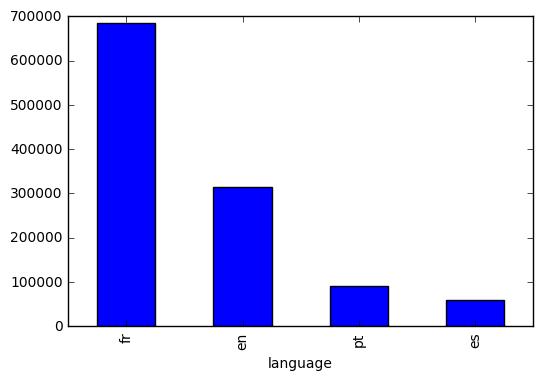

In [40]:
VD=df[df['canton']=='VD']
bb=pd.DataFrame()
bb=VD.groupby('language').size()
bb=bb.reset_index()
bb=bb.sort(0, ascending=False)
bb=bb.set_index('language')
bb.head(4)[0].plot(kind='bar')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


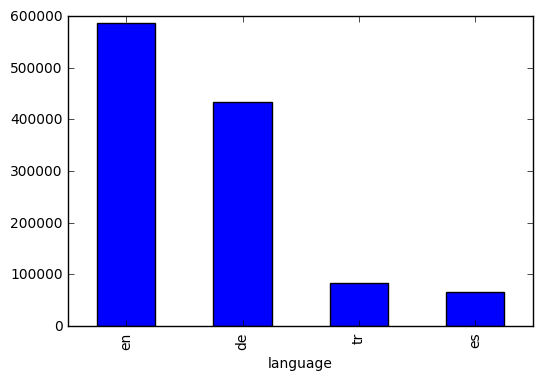

In [43]:
ZH=df[df['canton']=='ZH']
bb=pd.DataFrame()
bb=ZH.groupby('language').size()
bb=bb.reset_index()
bb=bb.sort(0, ascending=False)
bb=bb.set_index('language')
bb.head(4)[0].plot(kind='bar')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


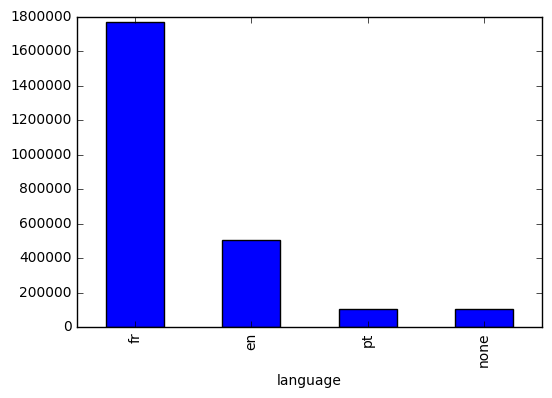

In [45]:
GE=df[df['canton']=='GE']
bb=pd.DataFrame()
bb=GE.groupby('language').size()
bb=bb.reset_index()
bb=bb.sort(0, ascending=False)
bb=bb.set_index('language')
bb.head(4)[0].plot(kind='bar')

In [21]:
df=pd.read('language_tweets.csv')

In [23]:
canton_list=df.canton.unique().tolist()


In [25]:
english=[]
french=[]
german=[]
italian=[]
for canton in canton_list:
    aa=df[df['canton']==canton]
    bb=aa.groupby('language').size()
    bb=bb.reset_index()
    bb=bb.sort(0, ascending=False)
    bb=bb.set_index('language')
    english.append(bb.loc['en'][0])
    french.append(bb.loc['fr'][0])
    german.append(bb.loc['de'][0])
    italian.append(bb.loc['it'][0])



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [28]:
to_be_normalized=[]
i=0
for can in canton_list:
    a=[]
    a.append(english[i])
    a.append(french[i])
    a.append(german[i])
    a.append(italian[i])
    to_be_normalized.append(a)
    i+=1
normalized=[]
for s in to_be_normalized:
    f = [float(i)/sum(s) for i in s]
    normalized.append(f)



In [29]:
english=[]
french=[]
german=[]
italian=[]

for n in normalized:
    english.append(n[0])
    french.append(n[1])
    german.append(n[2])
    italian.append(n[3])

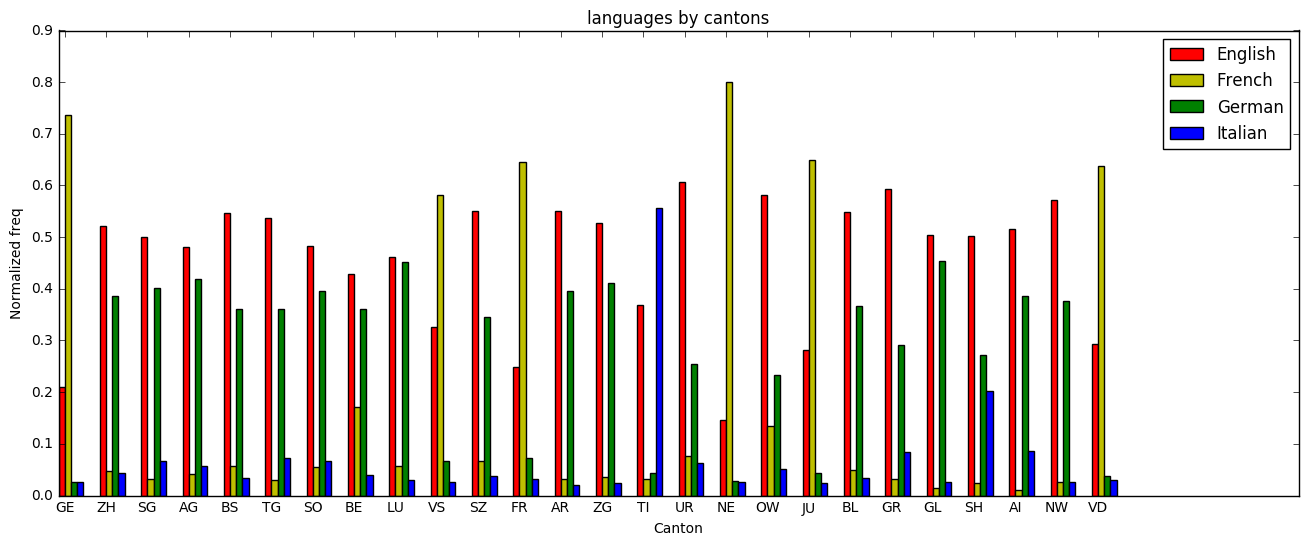

In [33]:
import numpy as np
import matplotlib.pyplot as plt

N = 26


ind = np.arange(N)  
width = 0.15

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, english, width, color='r')


rects2 = ax.bar(ind+width, french, width, color='y')



rects3 = ax.bar(ind+width+width, german, width, color='g')

rects4 = ax.bar(ind+width+width+width, italian, width, color='b')

ax.set_ylabel('Normalized freq')
ax.set_xlabel('Canton')
ax.set_title('languages by cantons')
ax.set_xticks(ind+width)
ax.set_xticklabels(canton_list)

ax.legend( (rects1[0], rects2[0],rects3[0], rects4[0]), ('English', 'French','German','Italian') )

plt.show()